<a href="https://colab.research.google.com/github/Jahnavireddy66/Weather-Based-Brightness-Recommender/blob/main/Weather_Based_Brightness_Recommenderipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn requests

In [12]:
import requests

API_KEY = "997aa789a933aab2a5d72f41b5b928eb"
CITY = "Anekal"

def get_weather_data(city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        weather = {
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "visibility": data["visibility"] / 1000,  # Convert to km
            "weather_condition": data["weather"][0]["main"]
        }
        return weather
    else:
        return None

weather_data = get_weather_data(CITY)
print(weather_data)

{'temperature': 21.66, 'humidity': 74, 'visibility': 10.0, 'weather_condition': 'Clouds'}


In [13]:
import pandas as pd

data = {
    "temperature": [15, 20, 10, 5, 12, 25, 30, 21.21, 27.99],
    "humidity": [85, 60, 90, 80, 70, 40, 30, 80, 44],
    "visibility": [2, 10, 1, 3, 8, 12, 15, 4, 2.2],  # in km
    "weather_condition": ["Fog", "Clear", "Fog", "Rain", "Clear", "Clear", "Clear", "Mist", "Smoke"],
    "brightness_level": [80, 30, 90, 70, 50, 20, 10, 85, 80]  # Target variable
}

df = pd.DataFrame(data)
print(df)

   temperature  humidity  visibility weather_condition  brightness_level
0        15.00        85         2.0               Fog                80
1        20.00        60        10.0             Clear                30
2        10.00        90         1.0               Fog                90
3         5.00        80         3.0              Rain                70
4        12.00        70         8.0             Clear                50
5        25.00        40        12.0             Clear                20
6        30.00        30        15.0             Clear                10
7        21.21        80         4.0              Mist                85
8        27.99        44         2.2             Smoke                80


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['weather_condition'] = label_encoder.fit_transform(df['weather_condition'])

X = df.drop('brightness_level', axis=1)
y = df['brightness_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 181.02499999999986


In [18]:
import numpy as np

def predict_brightness(model, weather_data):
    input_data = pd.DataFrame([weather_data])
    condition = input_data.loc[0, 'weather_condition']

    # Add unseen weather_condition to encoder
    if condition not in label_encoder.classes_:
        label_encoder.classes_ = np.append(label_encoder.classes_, condition)

    input_data['weather_condition'] = label_encoder.transform(input_data['weather_condition'])

    brightness = model.predict(input_data)[0]
    return brightness



In [21]:
CITY = "Anekal"
live_weather = get_weather_data(CITY)

if live_weather:
    print("Live Weather:", live_weather)
    brightness_level = predict_brightness(model, live_weather)
    print(f"Recommended Brightness Level: {brightness_level:.2f}")
else:
    print("❌ Failed to fetch weather data")


Live Weather: {'temperature': 21.66, 'humidity': 67, 'visibility': 10.0, 'weather_condition': 'Clouds'}
Recommended Brightness Level: 56.30


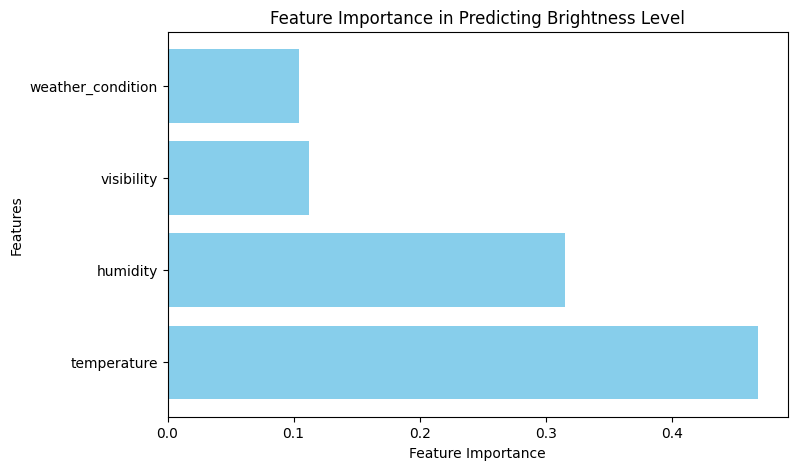

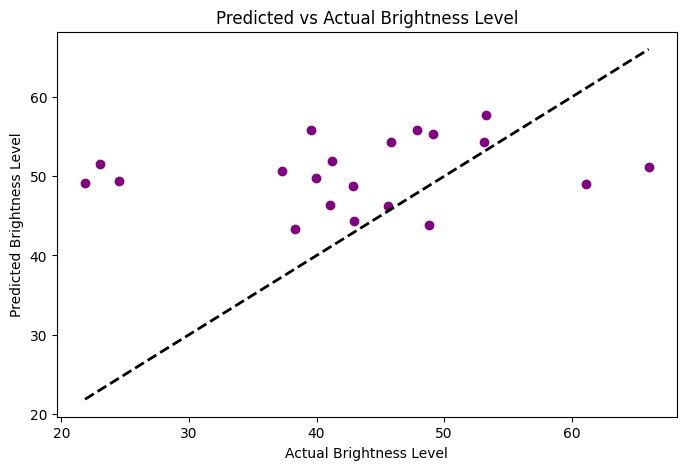

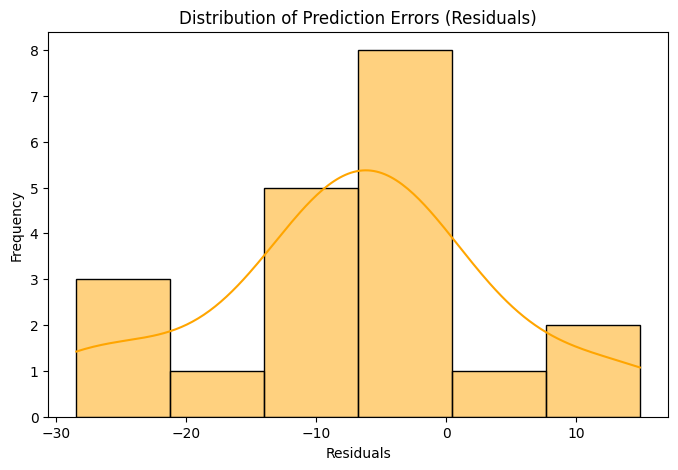

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample data setup (assuming the structure based on the given code)
data = {
    'temperature': np.random.normal(25, 5, 100),
    'humidity': np.random.randint(60, 100, 100),
    'visibility': np.random.randint(5, 10, 100),
    'weather_condition': np.random.choice(['Clear', 'Rain', 'Fog'], 100),
    'brightness_level': np.random.normal(50, 10, 100)
}
df = pd.DataFrame(data)

# Encoding and splitting data
label_encoder = LabelEncoder()
df['weather_condition'] = label_encoder.fit_transform(df['weather_condition'])

X = df.drop('brightness_level', axis=1)
y = df['brightness_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plotting Feature Importance
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Brightness Level")
plt.show()

# Scatter Plot for Predictions vs Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Brightness Level")
plt.ylabel("Predicted Brightness Level")
plt.title("Predicted vs Actual Brightness Level")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='orange')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.show()